## P1-1. Environmental Set-up & Data Loading

In [ ]:
import pandas as pd

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Google Drive where you have saved the unzipped
FOLDERNAME =  'ADX/'

assert FOLDERNAME is not None, 'ERROR'

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../

# 한글 나눔포트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 모델 수립을 위한 Train/Validation Set
df = pd.read_csv('./ADX/Data_UsedCarPrediction/P1_dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# 시스템 구현을 위한 Test Set 샘플
test_df = pd.read_csv('./ADX/Data_UsedCarPrediction/P1_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'


Mounted at /content/drive
/content/drive/My Drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, loo

In [ ]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

In [ ]:
#train/validation set의 head만 출력
df.head()

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,...,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1512A2469,20160105,모닝 LPi LX 기본 블랙 프리미엄,KNABK518BBT020038,20100616.0,2011,A/T,LPG,C,1000,...,0,0,0,0,0,1,0,0,0,0
1,1512A2364,20160105,K3 1.6 가솔린(4도어) Nobless,KNAFZ412BDA040155,20130207.0,2013,A/T,가솔린,A,1600,...,0,0,0,0,0,0,0,1,0,0
2,1512A2319,20160105,K3 1.6 가솔린(4도어) Trendy,KNAFK412BEA206484,20140128.0,2014,A/T,가솔린,A,1591,...,0,0,0,0,0,0,0,1,0,0
3,1512A1643,20160105,K5 2.0LPI 렌터카 디럭스,KNAGN418BDA366086,20121218.0,2013,A/T,LPG,B,2000,...,0,0,0,0,0,0,0,0,0,0
4,1512A1371,20160105,K5 2.0LPI 렌터카 스마트,KNAGN415BBA140279,20110428.0,2011,A/T,LPG,D,2000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,...,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1512A2469,20160105,모닝 LPi LX 기본 블랙 프리미엄,KNABK518BBT020038,20100616.0,2011,A/T,LPG,C,1000,...,0,0,0,0,0,1,0,0,0,0
1,1512A2364,20160105,K3 1.6 가솔린(4도어) Nobless,KNAFZ412BDA040155,20130207.0,2013,A/T,가솔린,A,1600,...,0,0,0,0,0,0,0,1,0,0
2,1512A2319,20160105,K3 1.6 가솔린(4도어) Trendy,KNAFK412BEA206484,20140128.0,2014,A/T,가솔린,A,1591,...,0,0,0,0,0,0,0,1,0,0
3,1512A1643,20160105,K5 2.0LPI 렌터카 디럭스,KNAGN418BDA366086,20121218.0,2013,A/T,LPG,B,2000,...,0,0,0,0,0,0,0,0,0,0
4,1512A1371,20160105,K5 2.0LPI 렌터카 스마트,KNAGN415BBA140279,20110428.0,2011,A/T,LPG,D,2000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36789,1905C0711,20190523,더뉴모닝 1.0가솔린 Deluxe,KNABE511BGT021147,20150216.0,2016,A/T,가솔린,A,998,...,0,0,0,0,0,0,0,0,0,0
36790,1905C0899,20190523,더뉴K9 V6 3.8 EXECUTIVE(이그제큐티브),KNALT413BFS025606,20141218.0,2015,A/T,가솔린,D,3778,...,0,0,0,0,0,0,0,0,0,0
36791,1905C0140,20190523,더뉴K9 V6 3.3 PRESTIGE(프레스티지),KNALT411BFS028524,20150506.0,2015,A/T,가솔린,B,3342,...,0,1,0,0,0,0,0,0,0,0
36792,1905C0350,20190523,더뉴K5 2.0 LPI 렌터카 디럭스,KNAGN418BFA544130,20140718.0,2015,A/T,LPG,A,1999,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
########################################################################################
# 교환여부를 3단계(small,medium,large)로 구분하여 각 단계별 교환 횟수 총합을 구함
# 판금/용접 여부는 2단계(small,large)로 구분하여 각 단계별 수리 횟수 총합을 구함
# 위에서 언급된 단계들은 중고차 성능 기록부 등을 이용하여 중요도(랭크)를 판단하여 나누었음 


delete_col = [] #col_check()에서 drop을 할 column의 집합을 관리하는 list
changes = ['BONET', 'FENDER', 'DOOR', 'TRUNK', 'PANNEL', 'STEP', 'FILER', 'PANEL', 'HOUSE', 'FRAME', 'QUARTER'] #교환의 키워드

def col_check(cur, data): #derived attribute 생성 후 이용된 column들을 dataframe에서 drop시키기 위한 함수
  for i in data.columns:
    if (i == 'S_SHEETING') or (i == 'L_SHEETING'): #S_SHEETING, L_SHEETING 변수를 생성 후 사용된 column들을 삭제할 때, 만들어진 파생변수가 지워지는 것을 방지하는 조건문
      continue

    if i.find(cur) >= 0: #문자열 cur을 dataframe의 현재 column i에서 확인을 했다면, 이는 drop 시켜야하니 delete_col[]에 추가
      delete_col.append(i)

  data.drop(delete_col, axis = 1, inplace = True) #delete_col[]에 있는 column들을 dataframe에서서 모두 drop


# 중고차 성능 기록부에서, 교환 이력중에 외관부의 1랭크에 해당하는 부위의 합
def s_change_sum(data): 
    small_list = ['BONET','FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER', 'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'TRUNK', 'LEFT_STEP', 'RIGHT_STEP', 
     'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL']
    s_sum = []
    for i in range(0, data.shape[0]):
        s_val = 0
        for j in small_list:
          s_val += data.loc[i, j]
        s_sum.append(s_val)
    return s_sum


# 중고차 성능 기록부에서, 교환 이력중에 외관부의 2랭크와 주요 골격 A랭크에 해당하는 부위의 합
def m_change_sum(data):
    mid_list = ['FRONT_PANNEL', 'LEFT_REAR_FENDER', 'RIGHT_REAR_FENDER', 'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL', 'LEFT_INSIDE_WHEEL_HOUSE', 'RIGHT_INSIDE_WHEEL_HOUSE', 
     'TRUNK_FLOOR', 'SHEET_PANEL', 'LEFT_QUARTER', 'RIGHT_QUARTER', 'LEFT_SIDE_PANEL', 'RIGHT_SIDE_PANEL', 'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL']
    m_sum = []
    for i in range(0, data.shape[0]):
        m_val = 0
        for j in mid_list:
          m_val += data.loc[i, j]
        m_sum.append(m_val)
    return m_sum


# 중고차 성능 기록부에서, 교환 이력중에 주요 골격의 B랭크와 주요 골격 C랭크에 해당하는 부위의 합
def l_change_sum(data):
    large_list = ['LEFT_FILER_A','RIGHT_FILER_A','LEFT_FILER_B','RIGHT_FILER_B','LEFT_FILER_C','RIGHT_FILER_C','LEFT_WHEEL_HOUSE','RIGHT_WHEEL_HOUSE','LEFT_REAR_WHEEL_HOUSE',
     'RIGHT_REAR_WHEEL_HOUSE','DASH_PANEL','SIDE_MEMBER_FRAME','FLOOR_PANEL','BACK_PANEL2','SIDE_MEMBER_FRAME2']
    l_sum = []
    for i in range(0, data.shape[0]):
        l_val = 0
        for j in large_list:
          l_val += data.loc[i, j]
        l_sum.append(l_val)
    return l_sum


# 중고차 성능 기록부에서, 판금 및 용접 이력중에 외관부의 2랭크와 주요 골격 A랭크에 해당하는 부위의 합
def sheet_s_sum(data):
  small_list  = ['LEFT_INSIDE_SHEETING','RIGHT_INSIDE_SHEETING','LEFT_REAR_INSIDE_PANEL_SHEETING','RIGHT_REAR_INSIDE_PANEL_SHEETING','TRUNK_FLOOR_SHEETING','SHEET_BACK_PANEL_SHEETING',
   'LEFT_SIDE_PANEL_SHEETING','RIGHT_SIDE_PANEL_SHEETING']
  s_sum = []
  for i in range(0, data.shape[0]):
      s_val = 0
      for j in small_list:
        s_val += data.loc[i, j]
      s_sum.append(s_val)
  return s_sum


# 중고차 성능 기록부에서, 판금 및 용접 이력중에 주요 골격의 B랭크와 주요 골격 C랭크에 해당하는 부위의 합
def sheet_l_sum(data):
  large_list = ['LEFT_WHEEL_HOUSE_SHEETING','RIGHT_WHEEL_HOUSE_SHEETING','LEFT_REAR_WHEEL_HOUSE_SHEETING','RIGHT_REAR_WHEEL_HOUSE_SHEETING','DASH_PANEL_SHEETING',
   'SIDE_MEMBER_FRAME_SHEETING','FLOOR_PANEL_SHEETING']
  l_sum = []
  for i in range(0, data.shape[0]):
      l_val = 0
      for j in large_list:
        l_val += data.loc[i, j]
      l_sum.append(l_val)
  return l_sum


# 위에서 언급한 새로운 파생변수 생성
df['S_CHANGE'] = s_change_sum(df)
df['M_CHANGE'] = m_change_sum(df)
df['L_CHANGE'] = l_change_sum(df)
df['S_SHEETING'] = sheet_s_sum(df)
df['L_SHEETING'] = sheet_l_sum(df)


In [ ]:
#파생변수를 모두 생성한 후, 사용된 column들을 모두 dataframe에서 drop
col_check('SHEETING', df)
delete_col = []

for i in changes:
  delete_col = []
  col_check(i, df)

In [ ]:
#Shipping Price > Nc grade price > Newcarprice 를 우선순위로 하여, PRICE라는 column을 만들 때 적용하기 위해 만들었음
#Shipping Price가 없다면 Nc grade price를, Nc grade price가 없다면 Newcarprice를 사용한다.
#만약 이 셋이 모두 없다면 이는 예측에 사용할 수 없으니 delete_idx[]에 담고 추후에 해당 행을 drop
def conversion_price(data):
  data['PRICE'] = data['SHIPPING_PRICE']
  data['PRICE'] = data['PRICE'].fillna(data['NC_GRADE_PRICE'])
  data['PRICE'] = data['PRICE'].fillna(data['NEWCARPRIC'])
  return data

In [ ]:
#PRICE라는 새로운 파생 변수 생성. Shipping Price > Nc grade price > Newcarprice 를 우선순위로 하여서 PRICE라는 값을 채워 넣었음
df = conversion_price(df)
df.drop(['SHIPPING_PRICE', 'NC_GRADE_PRICE', 'NEWCARPRIC'], axis = 1, inplace = True)
df.dropna(subset = 'PRICE', inplace = True)
df.reset_index(drop = True, inplace =True)

In [ ]:
options = ['ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY', 'SUNLOOPPANORAMA', 'SUNLOOPCOMMON', 'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'] #추가 옵션의 키워드

#어떤 차량에 이루어진 특정 옵션의 총 횟수를 계산하기 위한 함수
def calc_options(data): 
  option_list = []
  for i in range(0, data.shape[0]):
    num = 0
    for j in options:
      num += data.loc[i, j]
    option_list.append(num)
  
  return option_list

df['OPTIONS'] = calc_options(df)
df.drop(options, axis = 1, inplace = True) #모든 옵션들을 합치고 나서, 기존의 dataframe에 있던 옵션 column은 모두 drop

In [ ]:
# broken car column 생성
# 침수 ,전손, 접합, 운행불가인 요소가 하나라도 있는 차량은 broken이라고 판단하여 진행
#BROKEN : broken인 차량은 1, 정상적인 차량은 0을 나타내는 column

def calc_broken(data):
  data['BROKEN'] = 0
  broken = ['FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE'] #broken의 키워드
  for i in broken:
    data['BROKEN'] += data[i]

  data.drop(broken, axis = 1, inplace = True)
  data['BROKEN'] = data['BROKEN'].apply(lambda x: 1 if x > 0 else 0 )

calc_broken(df)

In [ ]:
#차량ID(GOODNO), CHASNO(차대번호), MF_KEY(제조사키)는 예측에서 사용할 수 없다 판단하여 column 전체를 drop
def drop1(data):
  useless = ['GOODNO', 'CHASNO', 'MF_KEY']
  data.drop(useless, axis = 1, inplace = True) 

drop1(df)

In [ ]:
# 차량 낙찰일자 - 등록일자 = 사용기간 ############문제 나는 부분 >> 칼럼 생성이 안되네네
# SUCCYMD - CARREGIYMD = USED_DATE라는 변수를 정의
import math
import datetime

def make_used_date(data):
  
  # 등록일자와 낙찰일자가 없는 행 제거
  data.dropna(subset = ['SUCCYMD'], inplace=True)
  data.dropna(subset = ['CARREGIYMD'], inplace=True)


  # 등록일자와 낙찰일자를 datetime 형식으로 변경
  success_date = []
  for i in data['SUCCYMD']:
    success_date.append(datetime.datetime( int(str(int(i))[:4]), int(str(int(i))[4:6]), int(str(int(i))[6:8]) ))
  data['SUCCYMD'] = success_date

  register_date = []
  for i in data['CARREGIYMD']:
      date_str = str(i)
      year = int(date_str[:4])
      month = int(date_str[4:6])
      day = int(date_str[6:8])
      register_date.append(datetime.datetime(year, month, day))
  data['CARREGIYMD'] = register_date


  # 등록일자보다 낙찰일자가 빠른 이상치 제거, 불가능한 경우이므로
  idx = data[data['SUCCYMD'] <= data['CARREGIYMD']].index
  data = data.drop(idx)

  # USED_DATE라는 파생변수 생성 후 int로 변환
  data['USED_DATE'] =  data['SUCCYMD'] - data['CARREGIYMD']

  #생성한 변수를 일자(days)로 나타냄, 형식은 integer
  data['USED_DATE'] = data['USED_DATE'].dt.days

  return data

df = make_used_date(df)

In [ ]:
#위에서 USED_DATE라는 파생변수를 생섷할 때 사용한 두 column drop
#내수수출구분(INNEEXPOCLASCD_YN) column은 예측에 사용할 수 없다 판단. 해당 column drop
def drop2(data): 
  useless2 = ['CARREGIYMD', 'SUCCYMD', 'INNEEXPOCLASCD_YN']
  data.drop(useless2, axis = 1, inplace = True) #df2로 copy

drop2(df)

In [ ]:
# MJ_MODEL_KEY를 이용하여 자동차를 차급별로 분류 실시(경차, 소형, 준중형, 중형, 준대형, 대형)
# 차급에 따라 1~6까지 값을 할당하고, 대응되는 모델키가 없는 경우 예외처리하여 0을 반환하도록 하는 함수 size_class()
def size_class(data):
    size_store = []
    size_list = ['light', 'compact', 'semi_mid', 'mid', 'semi_large', 'large']
    size_dict = {'light' : [42, 46, 50], 'compact': [45, 73], 'semi_mid' : [37, 53, 55, 71], 'mid' : [38, 44, 63, 1160], 'semi_large' : [39, 72], 'large' : [40, 62] }
    return_dict = {'light' : 1, 'compact': 2, 'semi_mid' : 3, 'mid' : 4, 'semi_large' : 5, 'large' : 6}
    for i in range(0, len(data)):
      flag = False #해당되는 i번째 인덱스에 할당된 값이 있는가, True: 있음, False : 없음
      for j in size_list:  
        if data.loc[i, 'MJ_MODEL_KEY'] in size_dict[j]:
            size_store.append(return_dict[j])
            flag = True
            break
      if flag == False:
        size_store.append(0) #대응되는 대표모델키가 없는 경우, 0을 반환하였음.

    return size_store

df.reset_index(drop = True, inplace =True)
df['SIZE'] = size_class(df) #SIZE:위에서 언급한대로 자동차의 차급에 따라 값을 가지고 있는 파생 변수

In [ ]:
#중고차 시세 예측에 필요없는 모델키, 등급키 column들, 그리고 차량명 column을 전부 drop 시켰다.
def drop3(data):
  data.drop(['NC_GRADE_KEY', 'MJ_GRADE_KEY', 'DT_MODEL_KEY', 'DT_GRADE_KEY', 'MJ_MODEL_KEY', 'CARNM'], axis = 1, inplace = True)

drop3(df)

In [ ]:
#용도명(USEUSENM), 소유명(OWNECLASNM)에서 새로운 파생변수 생성
#용도명에서, 리스와 렌트 요소는 0, 자가, 업무, 사업 요소는 1, 결측치는 nan으로 처리
#소유명에서, 법인에 해당하는 요소와 법인에 해당하지 않는 요소로 나누어서 각각 0, 1로 처리. 결측치는 nan으로 처리

#용도명 column에서 새로운 파생변수 USAGE를 만들기 위한 함수
def conversion_usage(data):
  rent = ['리스', '렌트']
  personal = ['자가', '업무', '사업']
  usage_list = []

  for i in range(0, len(data)):
    if data.loc[i, 'USEUSENM'] in rent:
      usage_list.append(0)
    elif data.loc[i, 'USEUSENM'] in personal:
      usage_list.append(1)
    else:
      usage_list.append(np.nan)
    
  return usage_list

#소유명 column에서 새로운 파생변수 OWNER를 만들기 위한 함수
def conversion_owner(data):
  corpor = ['법인', '법인상품']
  no_corpor = ['개인', '상품용','재외국인','종교단체','개인사업']
  owner_list = []

  for i in range(0, len(data)):
    if data.loc[i, 'OWNECLASNM'] in corpor:
      owner_list.append(0)
    elif data.loc[i ,'OWNECLASNM'] in no_corpor:
      owner_list.append(1)
    else:
      owner_list.append(np.nan)

  return owner_list

In [ ]:
#새로운 파생변수 USAGE와 OWNER를 생성
df.reset_index(drop = True, inplace =True)
df['USAGE'] = conversion_usage(df)
df['OWNER'] = conversion_owner(df)

In [ ]:
def drop4(data):
  #useless3[] : 위에서 두 개의 파생변수를 생성할 때 사용한 column들을 저장하는 list
  useless3 = ['USEUSENM', 'OWNECLASNM']

  #df3에서 위에서 언급한 두 column들을 drop한 후에 df4로 copy
  data.drop(useless3, axis = 1, inplace = True)

drop4(df)

In [ ]:
#USAGE에서 렌트와 리스의 경우에는 중고차의 시세가 떨어지는 경우가 많음
#OWNER에서 법인의 경우에 중고차의 시세가 떨어지는 경우가 많음
#USE_SCORE = USAGE에서의 값 + OWNER에서의 값
#USE_SCORE가 높을 수록 시세가 더 높게 책정될 수 있음을 의미함

df['USE_SCORE'] = df['USAGE'] + df['OWNER']

def drop5(data): 
  #USE_SCORE라는 새로운 파생 변수를 생성하는 데 사용한 2개의 column을 drop
  data.drop(['USAGE', 'OWNER'], axis = 1, inplace = True)

drop5(df)

In [ ]:
#위에서 USE_SCORE라는 변수를 생성하면서 nan값이 있을 것인데, 이 값들을 dataframe에서 삭제
df.dropna(subset = ['USE_SCORE'], inplace = True)

#년식차량구분(YEARCHK) column은 예측에서 제외함
df.drop('YEARCHK', axis = 1, inplace = True)

In [ ]:
###색깔 ENCODING
#COLOR에 따라 가중치 부여후 COLOR column에 replace(A:4, B:3, C:2, D:1, F:0)
#숫자가 높을 수록 구매자들이 많이 선호함을 의미
def color(data):
  col_list = []
  col_dict = {'A' : 4, 'B': 3, 'C': 2 , 'D' : 1}

  for i in range(0, len(data)):
    if data.loc[i, 'COLOR'] in col_dict:
      col_list.append(col_dict[data.loc[i, 'COLOR']])
    else:
      col_list.append(0)

  return col_list


### 미션 ENCODING
# CVT는 자동변속기의 일종, 자동변속기에 1, 수동 변속기에 0 할당
def mission_encode(data):
  mission_list = []
  
  for i in range(len(data)):
    if data.loc[i, 'MISSNM'] == 'A/T':
      mission_list.append(1)
    elif data.loc[i, 'MISSNM'] == 'CVT':
      mission_list.append(1)
    else:
      mission_list.append(0)

  return mission_list


### 전기 또는 하이브리드 등의 연료명 encoding
#전기차와 전기차가 아닌 것으로 나누었음. 전기차라면 1, 아니면 0
def electric_check(data):
  electric_check_list = []

  for i in range(len(data)):
    if data.loc[i, 'FUELNM'] == '전기':
      electric_check_list.append(1)
    else:
      electric_check_list.append(0)

  return electric_check_list

#범주형 변수들의 함수에 따른 encoding 진행
df.reset_index(drop = True, inplace = True)
df['COLOR'] = color(df)
df['MISSNM'] = mission_encode(df)
df['FUELNM'] = electric_check(df)

In [ ]:
##outlier elimination phase

def outlier_elimination(df5):
  #전기차가 아닌데, 배기량이 750미만으로 매우 낮은 data는 삭제하였음 >> EXHA에 대한 이상치를 제거
  df5 = df5.drop(df5[(df5['FUELNM']!= 1) & (df5['EXHA'] < 750)].index)

  #TRAVDIST에 대하여 하위 1%의 데이터를 이상치로 판단 하여 제거
  bot, top = np.percentile(df5['TRAVDIST'],[1, 100])
  df5 = df5.drop(index = (np.where((df5['TRAVDIST'] < bot) | (df5['TRAVDIST'] > top))[0]), axis='column')
  df5 = df5.reset_index()
  df5 = df5.drop(['index'], axis = 1)

  #PRICE에 대하여 하위 3%의 데이터를 이상치로 판단 하여 제거
  bot, top = np.percentile(df5['PRICE'],[3, 100])
  df5 = df5.drop(index = (np.where((df5['PRICE'] < bot) | (df5['PRICE'] > top))[0]),axis = 'column')
  df5 = df5.reset_index()
  df5 = df5.drop(['index'],axis = 1)

  #USED_DATE에 대하여 하위, 상위 0.5%의 데이터를 이상치로 판단 하여 제거거
  bot, top = np.percentile(df5['USED_DATE'],[0.5,99.5])
  df5 = df5.drop(index = (np.where((df5['USED_DATE'] < bot) | (df5['USED_DATE'] > top))[0]),axis = 'column')
  df5 = df5.reset_index()
  df5 = df5.drop(['index'],axis = 1)

  return df5


In [ ]:
df1 = outlier_elimination(df)

In [ ]:
df1

,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,SUCCPRIC,S_CHANGE,M_CHANGE,L_CHANGE,S_SHEETING,L_SHEETING,PRICE,OPTIONS,BROKEN,USED_DATE,SIZE,USE_SCORE
0,2011,1,0,2,1000,38480,4300000,0,0,0,0,0,11310000.0,1,0,2029,1,1.0
1,2013,1,0,4,1600,62240,11650000,0,0,0,0,0,19750000.0,6,0,1062,3,1.0
2,2014,1,0,4,1591,37926,12350000,0,0,0,0,0,19340000.0,6,0,707,3,1.0
3,2013,1,0,3,2000,110149,5900000,0,0,0,0,0,17680000.0,2,0,1113,4,0.0
4,2011,1,0,1,2000,81675,4730000,3,0,1,1,1,15800000.0,2,0,1713,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34657,2016,1,0,4,998,62180,5910000,0,0,0,0,0,12500000.0,3,0,1557,1,1.0
34658,2015,1,0,1,3778,97801,19200000,1,0,0,1,1,56800000.0,5,0,1617,6,1.0
34659,2015,1,0,3,3342,153601,18200000,2,0,0,0,0,49089202.0,6,0,1478,6,0.0
34660,2015,1,0,4,1999,140058,5800000,2,0,0,0,1,17130000.0,3,0,1770,4,0.0


## P1-2. Modelling
- df를 사용하여 예측모형 수립
- 상세 사항은 업로드 된 비디오 참고

In [ ]:
df = df1.copy()

In [ ]:
df.head()

,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,SUCCPRIC,S_CHANGE,M_CHANGE,L_CHANGE,S_SHEETING,L_SHEETING,PRICE,OPTIONS,BROKEN,USED_DATE,SIZE,USE_SCORE
0,2011,1,0,2,1000,38480,4300000,0,0,0,0,0,11310000.0,1,0,2029,1,1.0
1,2013,1,0,4,1600,62240,11650000,0,0,0,0,0,19750000.0,6,0,1062,3,1.0
2,2014,1,0,4,1591,37926,12350000,0,0,0,0,0,19340000.0,6,0,707,3,1.0
3,2013,1,0,3,2000,110149,5900000,0,0,0,0,0,17680000.0,2,0,1113,4,0.0
4,2011,1,0,1,2000,81675,4730000,3,0,1,1,1,15800000.0,2,0,1713,4,0.0


- NORMALIZE DATA

In [ ]:
#### Normalize Function Set ###

# data를 (x-mu)/sigma 로 변환하는 기본적인 z_scaling 
def z_scaler(data, column):
    temp_df = data[column]
    normalized_df = (temp_df - temp_df.mean()) / temp_df.std()
    cache = {}
    cache['mean'] = temp_df.mean()
    cache['std'] = temp_df.std()
    return normalized_df, cache

# data를 (x-median)/iqr 로 변환하는 robust scaling 
def robust_scaler(data, column):
  temp_df = data[column]
  q1 = np.quantile(temp_df, 0.25)
  q3 = np.quantile(temp_df, 0.75)
  cache = {}
  iqr = q3 - q1
  normalize_df = (temp_df - temp_df.median()) / iqr
  cache['median'] = temp_df.median()
  cache['IQR'] = iqr
  return normalize_df, cache

# data를 -1과 1사이의 값으로 변환해주는 modified minmax scaling 
def mod_minmax_scaler(data, column):
    tmp_data = data[column]
    min_val = min(tmp_data)
    max_val = max(tmp_data)
    cache ={}
    cache['min'] = min_val
    cache['max'] = max_val
    scaled_df = -1 + 2*(tmp_data - min_val)/(max_val - min_val)
    return scaled_df, cache

In [ ]:
### Normalize Function Set for TEST DATA ###
## 위와 같은 방식의 scaling을 test set에도 적용하기 위함 ##
def test_z_scaler(data, column, cache):
    temp_df = data[column]
    normalized_df = (temp_df - cache['mean']) / cache['std']
    return normalized_df

def test_robust_scaler(data, column, cache):
  temp_df = data[column]
  normalized_df = (temp_df - cache['median']) / cache['IQR']
  return normalized_df

def test_mod_minmax_scaler(data, column, cache):
    tmp_data = data[column]
    scaled_df = -1 + 2*(tmp_data - cache['min'])/(cache['max'] - cache['min'])
    return scaled_df


In [ ]:
z_list = ['TRAVDIST', 'PRICE', 'USED_DATE'] ## z_scaling을 적용할 3가지 수치형 변수 select

df1 = df.copy()
df1.loc[:, z_list], z_cache = z_scaler(df1, z_list) ## 3가지 수치형 변수에 대해서 z scaling 진행
df1.loc[:, 'EXHA'], r_cache = robust_scaler(df1, 'EXHA') ## 배기량 변수에 대해서는 robust scaling 방식을 채택
df1.loc[:, 'YEAR'], m_cache = mod_minmax_scaler(df1, 'YEAR') ## 연식 변수에 대해서는 modified minmax scaling 방식을 채택

<Axes: ylabel='Density'>

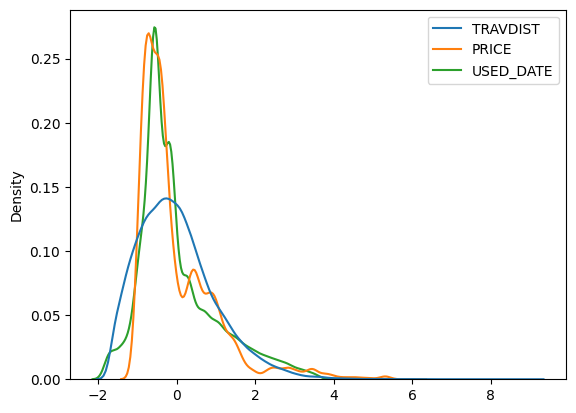

In [ ]:
### 수치형 변수의 정규분포성 확인 ###
sns.kdeplot(df1[z_list])

In [ ]:
### 낙찰가격을 종속변수 y_train, 그 외의 컬럼들은 독립변수 X_trian 으로 나눠주는 함수 ###

def splitData(df, y_column):
    
    columns_ = df.columns
    # Subsample the data
    mask = list(range(0,df.shape[0]))
    X_train= df.iloc[mask, :].drop(y_column, 1)
    y_train = df.iloc[mask][y_column]
    
    return X_train, y_train

X_train, y_train = splitData(df1, 'SUCCPRIC')

<ipython-input-31-1ac466128da9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train= df.iloc[mask, :].drop(y_column, 1)


- RANDOM FOREST MODEL FITTING

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
### n_estimators, max_depth, max_features, min_samples_leaf 4가지 hyperparameter를 조절하여 model fitting
# n_estimators: tree의 수 
# max_depth: tree의 깊이
# max_features: node 분할 시 무작위로 선택되는 변수의 수
# min_samples_leaf: 루트 노드에 남길 수 있는 최종 샘플의 개수

best_hyperparameter = None
best_rf = None
params = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [100, 200, 300],
    'max_features' : [1, 2, 3],
    'min_samples_leaf' : [1, 3, 5]
}

# GridSearch 방식을 사용하여 Cross-Validation 수 = 3, Scoring fn = negative mape 로 설정하여 모델 최적화
rf_model = RandomForestRegressor()
grid_rf = GridSearchCV(rf_model, param_grid=params, cv=3, refit=True, verbose = 3, scoring = 'neg_mean_absolute_percentage_error')
grid_rf.fit(X_train, y_train)

# 가장 좋은 성능을 보인 모델의 hyperparameter와 model, score를 저장
best_hyperparameter = grid_rf.best_params_
best_rf = grid_rf.best_estimator_
best_score = grid_rf.best_score_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=50;, score=-0.132 total time=   3.0s
[CV 2/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=50;, score=-0.129 total time=   1.6s
[CV 3/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=50;, score=-0.154 total time=   1.5s
[CV 1/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=100;, score=-0.132 total time=   3.0s
[CV 2/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=100;, score=-0.125 total time=   3.0s
[CV 3/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=100;, score=-0.151 total time=   3.7s
[CV 1/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=150;, score=-0.128 total time=   5.0s
[CV 2/3] END max_depth=100, max_features=1, min_samples_leaf=1, n_estimators=150;, score=-0.126 total time=   4.4s
[CV 3/3] END max_dept

In [ ]:
# 최적 모델의 결과 출력
print('Best hyperparameters for RandomForest: ',best_hyperparameter)
print('Best RandomForest Model: ',best_rf)
print('Best MAPE for RandomForest: ',-best_score)

Best hyperparameters for RandomForest:  {'max_depth': 300, 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 150}
Best RandomForest Model:  RandomForestRegressor(max_depth=300, max_features=3, n_estimators=150)
Best MAPE for RandomForest:  0.11796247919602826


- ADABOOST MODEL FITTING

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
### n_estimators, max_depth, learning_rate 3가지 hyperparameter를 조절하여 model fitting
# n_estimators: boosting이 끝난 후 estimator의 최대 개수
# max_depth: base estimator로 decision tree regressor를 설정, depth 조정
# learning_rate : boosting과정에서 부여되는 가중치

best_ada = None 
best_hyperparameter_ada = None
params_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate' : [1, 1.25, 1.5]
}

depths = [10, 20, 30]
best_model_ada = {}
best_score_ada = {}

## base estimator Decision Tree의 depth를 바꿔가며 GridSearch로 모델 최적화
for depth in depths:
  ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth = depth))
  grid_ada = GridSearchCV(ada_model, param_grid=params_ada, cv=3, refit=True, verbose = 3, scoring = 'neg_mean_absolute_percentage_error')
  grid_ada.fit(X_train, y_train)
  # Decision Tree 의 depth 마다 최적의 model과 score 저장
  best_model_ada[depth] = grid_ada.best_estimator_
  best_score_ada[depth] = grid_ada.best_score_

## 최종적으로 최고의 성능을 보이는 model 저장  
best_ada = best_model_ada[max(best_score_ada, key = best_score_ada.get)]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .learning_rate=1, n_estimators=50;, score=-0.122 total time=   4.6s
[CV 2/3] END .learning_rate=1, n_estimators=50;, score=-0.117 total time=   6.0s
[CV 3/3] END .learning_rate=1, n_estimators=50;, score=-0.125 total time=   4.8s
[CV 1/3] END learning_rate=1, n_estimators=100;, score=-0.124 total time=   9.8s
[CV 2/3] END learning_rate=1, n_estimators=100;, score=-0.117 total time=   8.5s
[CV 3/3] END learning_rate=1, n_estimators=100;, score=-0.121 total time=  10.1s
[CV 1/3] END learning_rate=1, n_estimators=150;, score=-0.123 total time=  13.8s
[CV 2/3] END learning_rate=1, n_estimators=150;, score=-0.115 total time=  13.9s
[CV 3/3] END learning_rate=1, n_estimators=150;, score=-0.121 total time=  14.3s
[CV 1/3] END learning_rate=1.25, n_estimators=50;, score=-0.125 total time=   4.4s
[CV 2/3] END learning_rate=1.25, n_estimators=50;, score=-0.116 total time=   5.5s
[CV 3/3] END learning_rate=1.25, n_estimators

In [ ]:
### 최종 모델의 hyperparameter와 model, mape 출력
print('Best hyperparameter for AdaBoost: ',best_ada.get_params(deep = False))
print('Best AdaBoost Model: ',best_ada)
print('Best MAPE for AdaBoost: ',-max(best_score_ada.values()))

Best hyperparameter for AdaBoost:  {'base_estimator': 'deprecated', 'estimator': DecisionTreeRegressor(max_depth=20), 'learning_rate': 1.5, 'loss': 'linear', 'n_estimators': 100, 'random_state': None}
Best AdaBoost Model:  AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1.5, n_estimators=100)
Best MAPE for AdaBoost:  0.11057932030811075


- FEATURE IMPORTANCE & MODEL SELECTION

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

## feature importance 를 시각화 하여 plot하기 위한 함수
def plot_feature_importance(importance_, features_,model_type):
      dict_ = {'feature importance' : importance_, 'features' : features_}
      df = pd.DataFrame(dict_)
      df.sort_values(by=['feature importance'], ascending=False,inplace=True)
      plt.figure(figsize=(10,10))
      sns.barplot(x=df['feature importance'], y=df['features'])
      plt.title(model_type + 'FEATURE IMPORTANCE')
      plt.xlabel('FEATURE IMPORTANCE')
      plt.ylabel('FEATURE NAMES')

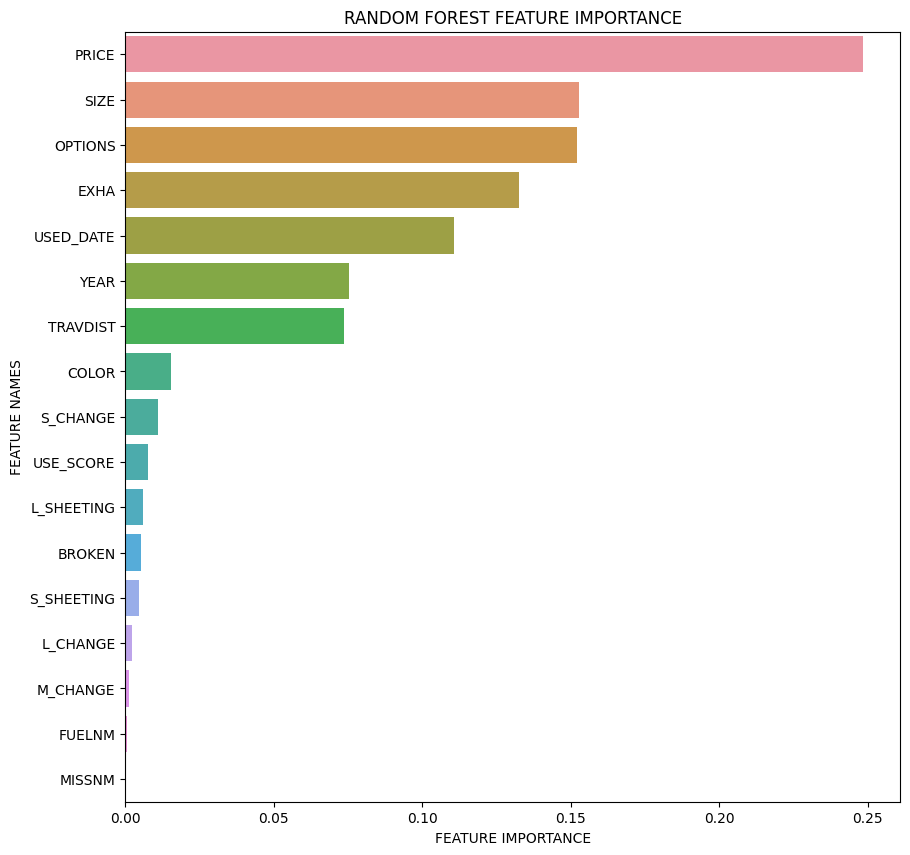

In [ ]:
## Random Forest의 FEATURE IMPORTANCE MAP
plot_feature_importance(best_rf.feature_importances_, X_train.columns, 'RANDOM FOREST ')

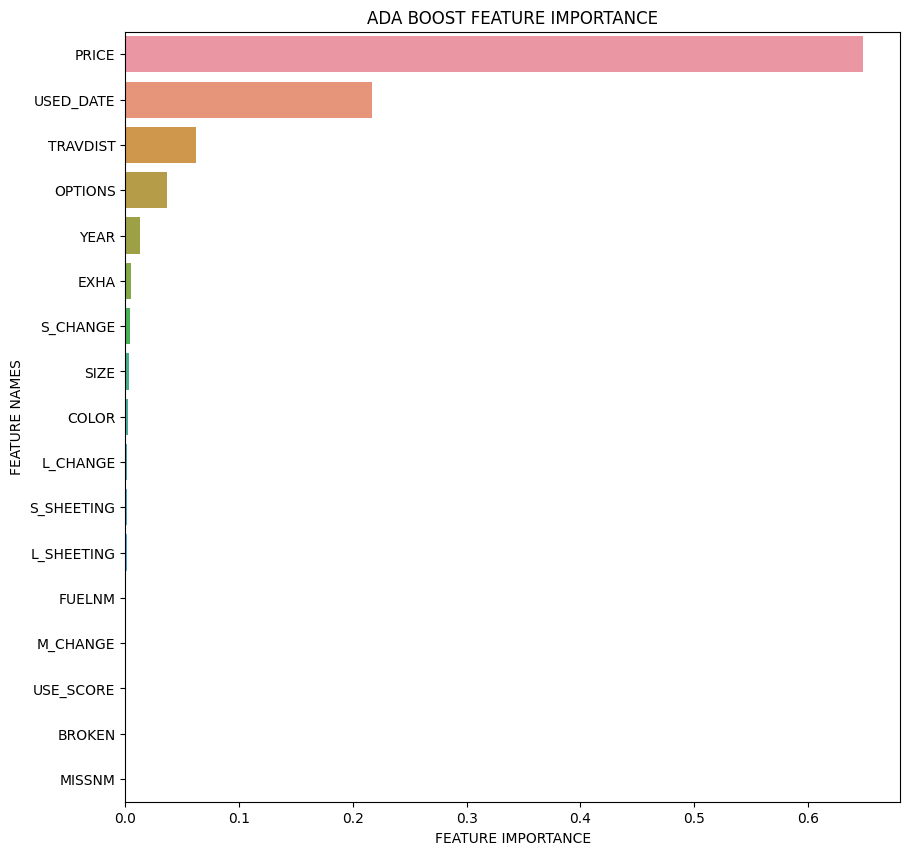

In [ ]:
## AdaBoost의 FEATURE IMPORTANCE MAP
plot_feature_importance(best_ada.feature_importances_, X_train.columns, 'ADA BOOST ')

## P1-3. System Implementation
- df_test에 기반하여 실제 사용을 위한 system implemetation 작업 진행

In [ ]:
#real-world implementation을 위한 test set
#실제 test data import 요망
real_test_df = pd.read_csv('./ADX/Data_UsedCarPrediction/P1_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
data = real_test_df.copy()

In [ ]:
#feature engineering for real world data

delete_col = []
data['S_CHANGE'] = s_change_sum(data)
data['M_CHANGE'] = m_change_sum(data)
data['L_CHANGE'] = l_change_sum(data)
data['S_SHEETING'] = sheet_s_sum(data)
data['L_SHEETING'] = sheet_l_sum(data)

col_check('SHEETING', data)
delete_col = []

for i in changes:
  delete_col = []
  col_check(i, data)

data = conversion_price(data)
data.drop(['SHIPPING_PRICE', 'NC_GRADE_PRICE', 'NEWCARPRIC'], axis = 1, inplace = True)
data.dropna(subset = 'PRICE', inplace = True)
data.reset_index(drop = True, inplace =True)

data['OPTIONS'] = calc_options(data)
data.drop(options, axis = 1, inplace = True)

calc_broken(data)

drop1(data)

data = make_used_date(data)

drop2(data)

data.reset_index(drop = True, inplace =True)
data['SIZE'] = size_class(data)

drop3(data)

data.reset_index(drop = True, inplace =True)
data['USAGE'] = conversion_usage(data)
data['OWNER'] = conversion_owner(data)

drop4(data)

data['USE_SCORE'] = data['USAGE'] + data['OWNER']

drop5(data)

data.dropna(subset = ['USE_SCORE'], inplace = True)

data.drop('YEARCHK', axis = 1, inplace = True)

data.reset_index(drop = True, inplace = True)
data['COLOR'] = color(data)
data['MISSNM'] = mission_encode(data)
data['FUELNM'] = electric_check(data)

data = outlier_elimination(data)

In [ ]:
X_test, y_test = splitData(data, 'SUCCPRIC')

<ipython-input-31-1ac466128da9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train= df.iloc[mask, :].drop(y_column, 1)


In [ ]:
z_list = ['TRAVDIST', 'PRICE', 'USED_DATE'] ## z_scaling을 적용할 3가지 수치형 변수 select

## 기존 정규화 cache를 이용하여 test data 정규화 실시
X_test_norm = X_test.copy()
X_test_norm.loc[:, z_list] = test_z_scaler(X_test, z_list, z_cache) 
X_test_norm.loc[:, 'EXHA'] = test_robust_scaler(X_test, 'EXHA', r_cache) 
X_test_norm.loc[:, 'YEAR'] = test_mod_minmax_scaler(X_test, 'YEAR', m_cache) 

- TEST SET VALIDATION

In [ ]:
######### Test for our best random forest ###########
epsilon = 1e-12
print('Test MSE: ', np.mean(np.square(best_rf.predict(X_test_norm) - y_test)))
print('Test MAPE:', np.mean(np.abs(best_rf.predict(X_test_norm) - y_test) / np.maximum(np.abs(y_test), epsilon)))
print('Test MAE:', np.mean(np.abs(best_rf.predict(X_test_norm) - y_test)))

Test MSE:  265759353888.889
Test MAPE: 0.07340154596941525
Test MAE: 404783.3333333334


In [ ]:
######### Test for our best adaboost ###########
epsilon = 1e-12
print('Test MSE: ', np.mean(np.square(best_ada.predict(X_test_norm) - y_test)))
print('Test MAPE:', np.mean(np.abs(best_ada.predict(X_test_norm) - y_test) / np.maximum(np.abs(y_test), epsilon)))
print('Test MAE:', np.mean(np.abs(best_ada.predict(X_test_norm) - y_test)))

Test MSE:  348839351147.167
Test MAPE: 0.07077005579412429
Test MAE: 442245.33088862355
